## **K-Means Clustering**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,5/22/2019,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
data.shape

(48895, 16)

Text(0.5, 1.0, 'Price against Number of Reviews')

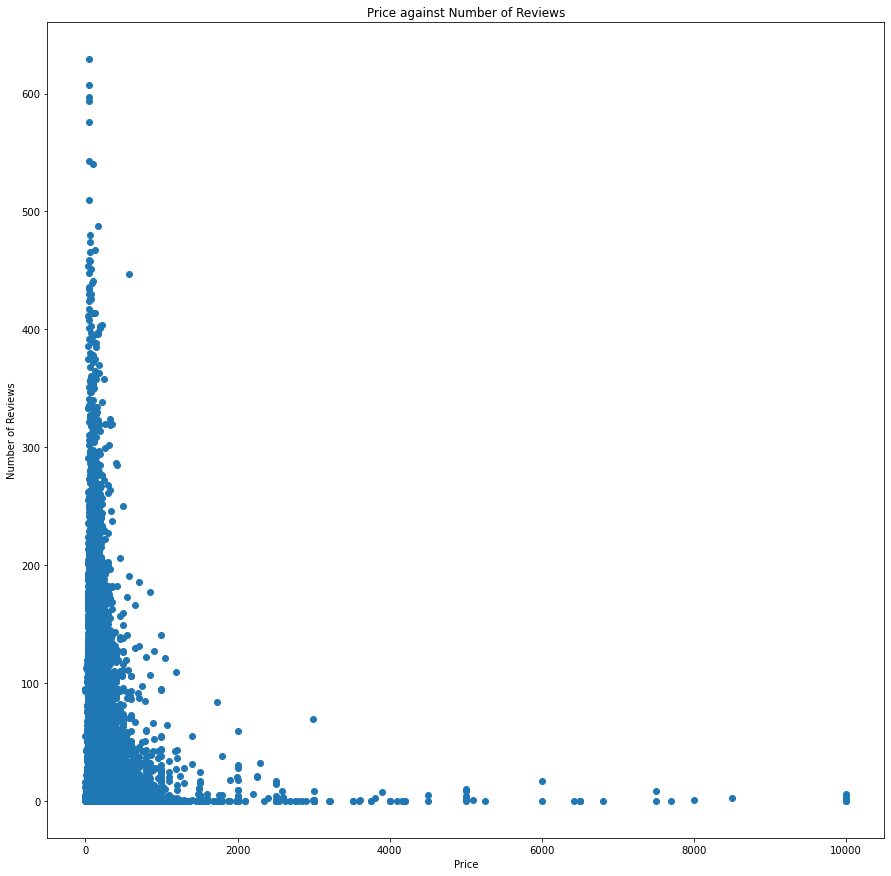

In [5]:
plt.figure(figsize=(15,15))
plt.scatter(data.loc[:, "price"], data.loc[:, "number_of_reviews"])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price against Number of Reviews')

In [6]:
data = data.fillna(0)
data = data.set_index('neighbourhood_group')

In [7]:
data.tail(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Manhattan,36478343,Welcome all as family,274273284,Anastasia,East Harlem,40.78749,-73.94749,Private room,140,1,0,5/21/2019,0.0,1,180
Manhattan,36478357,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088,Joseph,Harlem,40.80953,-73.95410,Private room,60,1,0,5/21/2019,0.0,1,26
Brooklyn,36479230,Studio sized room with beautiful light,65767720,Melanie,Bushwick,40.70418,-73.91471,Private room,42,7,0,5/21/2019,0.0,1,16
Queens,36479723,Room for rest,41326856,Jeerathinan,Elmhurst,40.74477,-73.87727,Private room,45,1,0,5/21/2019,0.0,5,172
Brooklyn,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,5/21/2019,0.0,1,22
Brooklyn,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,5/21/2019,0.0,3,365
Brooklyn,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Greenpoint,40.72585,-73.94001,Private room,54,6,0,5/21/2019,0.0,1,15
Brooklyn,36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Bushwick,40.69652,-73.91079,Private room,40,20,0,5/21/2019,0.0,1,31
Manhattan,36482416,Sunny Bedroom NYC! Walking to Central Park!!,131529729,Kendall,East Harlem,40.79755,-73.93614,Private room,75,2,0,5/21/2019,0.0,2,364


Organizing data frame.

In [8]:
df_B = pd.DataFrame(data.loc["Brooklyn", ["price","number_of_reviews"]])
df_M = pd.DataFrame(data.loc["Manhattan", ["price","number_of_reviews"]])
df_Q = pd.DataFrame(data.loc["Queens", ["price","number_of_reviews"]])
df_X = pd.DataFrame(data.loc["Bronx", ["price","number_of_reviews"]])
df_S = pd.DataFrame(data.loc["Staten Island", ["price","number_of_reviews"]])

Finding clusters.

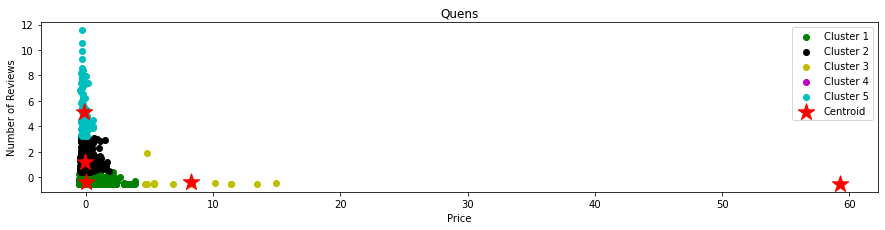

In [9]:
X_std_Q = StandardScaler().fit_transform(df_Q)

km_Q = KMeans(n_clusters=5, max_iter=100)
km_Q.fit(X_std_Q)
centroids_Q = km_Q.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_Q[km_Q.labels_ == 0, 0], X_std_Q[km_Q.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_Q[km_Q.labels_ == 1, 0], X_std_Q[km_Q.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_Q[km_Q.labels_ == 2, 0], X_std_Q[km_Q.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_Q[km_Q.labels_ == 3, 0], X_std_Q[km_Q.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_Q[km_Q.labels_ == 4, 0], X_std_Q[km_Q.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_Q[:, 0], centroids_Q[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
#plt.xlim([-.5, 30])
#plt.ylim([-.5, 30])
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Quens')
ax.set_aspect('equal')

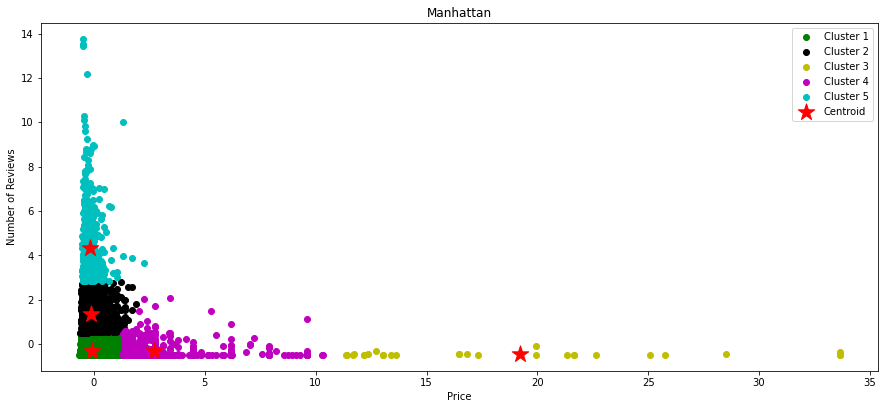

In [10]:
X_std_M = StandardScaler().fit_transform(df_M)

km_M = KMeans(n_clusters=5, max_iter=100)
km_M.fit(X_std_M)
centroids_M = km_M.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_M[km_M.labels_ == 0, 0], X_std_M[km_M.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_M[km_M.labels_ == 1, 0], X_std_M[km_M.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_M[km_M.labels_ == 2, 0], X_std_M[km_M.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_M[km_M.labels_ == 3, 0], X_std_M[km_M.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_M[km_M.labels_ == 4, 0], X_std_M[km_M.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_M[:, 0], centroids_M[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Manhattan')
ax.set_aspect('equal')

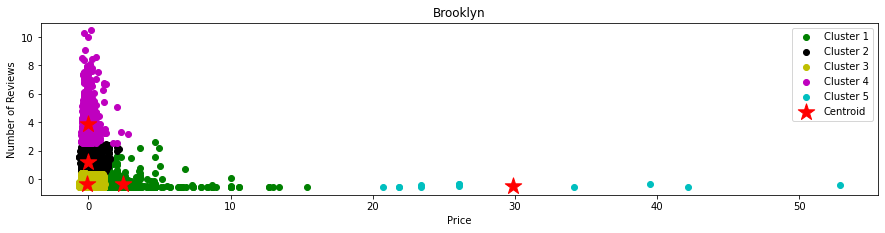

In [11]:
X_std_B = StandardScaler().fit_transform(df_B)

km_B = KMeans(n_clusters=5, max_iter=100)
km_B.fit(X_std_B)
centroids_B = km_B.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_B[km_B.labels_ == 0, 0], X_std_B[km_B.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_B[km_B.labels_ == 1, 0], X_std_B[km_B.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_B[km_B.labels_ == 2, 0], X_std_B[km_B.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_B[km_B.labels_ == 3, 0], X_std_B[km_B.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_B[km_B.labels_ == 4, 0], X_std_B[km_B.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_B[:, 0], centroids_B[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Brooklyn')
ax.set_aspect('equal')

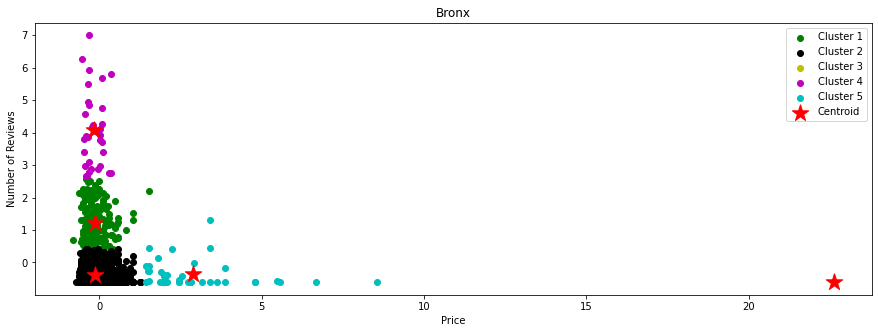

In [12]:
X_std_X = StandardScaler().fit_transform(df_X)

km_X = KMeans(n_clusters=5, max_iter=100)
km_X.fit(X_std_X)
centroids_X = km_X.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_X[km_X.labels_ == 0, 0], X_std_X[km_X.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_X[km_X.labels_ == 1, 0], X_std_X[km_X.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_X[km_X.labels_ == 2, 0], X_std_X[km_X.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_X[km_X.labels_ == 3, 0], X_std_X[km_X.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_X[km_X.labels_ == 4, 0], X_std_X[km_X.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_X[:, 0], centroids_X[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Bronx')
ax.set_aspect('equal')


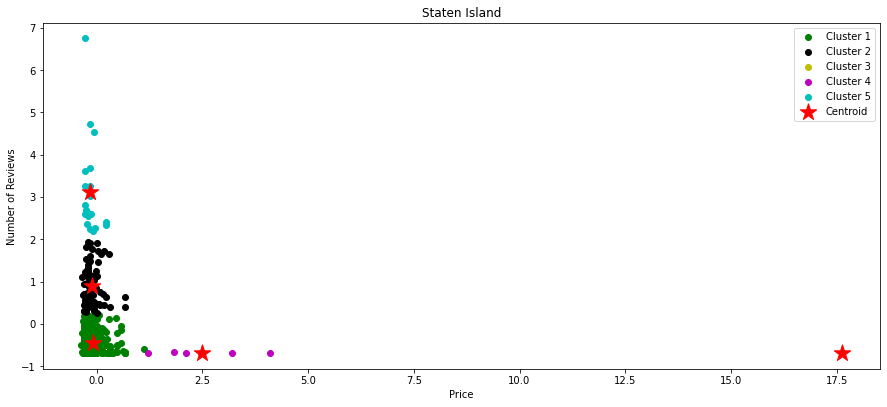

In [13]:
X_std_S = StandardScaler().fit_transform(df_S)

km_S = KMeans(n_clusters=5, max_iter=100)
km_S.fit(X_std_S)
centroids_S = km_S.cluster_centers_

fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(X_std_S[km_S.labels_ == 0, 0], X_std_S[km_S.labels_ == 0,1], c ='g', label="Cluster 1")
plt.scatter(X_std_S[km_S.labels_ == 1, 0], X_std_S[km_S.labels_ == 1,1], c ='k', label="Cluster 2")
plt.scatter(X_std_S[km_S.labels_ == 2, 0], X_std_S[km_S.labels_ == 2,1], c ='y', label="Cluster 3")
plt.scatter(X_std_S[km_S.labels_ == 3, 0], X_std_S[km_S.labels_ == 3,1], c ='m', label="Cluster 4")
plt.scatter(X_std_S[km_S.labels_ == 4, 0], X_std_S[km_S.labels_ == 4,1], c ='c', label="Cluster 5")

plt.scatter(centroids_S[:, 0], centroids_S[:, 1], marker ='*', s=300, c = 'r', label='Centroid')

plt.legend()
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Staten Island')
ax.set_aspect('equal')

Cluster centers

In [20]:
km.cluster_centers_

array([[7.75970068e+02, 1.16340136e+01],
       [1.83353609e+02, 1.35104591e+01],
       [5.53347059e+03, 2.88235294e+00],
       [3.58773721e+02, 1.55831833e+01],
       [9.01818182e+03, 2.27272727e+00],
       [3.09504000e+03, 3.08000000e+00],
       [1.07620271e+02, 1.51845221e+02],
       [7.59433650e+01, 1.32608516e+01],
       [1.68375439e+03, 6.00000000e+00]])

Finding elbow point using elbow method.


In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['price','number_of_reviews']])
    sse.append(km.inertia_)

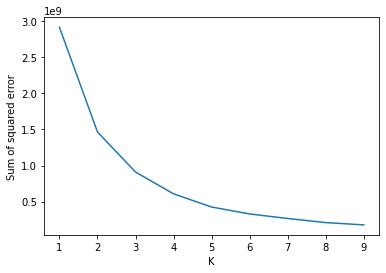

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)